In [1]:
import pickle
import z_update_layer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import tensorflow as tf
import tensorflow.keras.optimizers


In [2]:
import pickle
with open("/home/richertlr/Documents/summer2019/cifar-10-batches-py/data_batch_1",'rb') as fo:
    dict=pickle.load(fo,encoding="bytes")

In [3]:
with open("/home/richertlr/Documents/summer2019/cifar-10-batches-py/test_batch","rb") as fo2:
    dict2=pickle.load(fo2,encoding="bytes")

In [4]:
temp = np.reshape(dict[b'data']/255,[10000,3,32,32])
x_input = np.transpose(temp,(0,2,3,1))
temp = np.reshape(dict2[b'data']/255,[-1,3,32,32])
x_val = np.transpose(temp,(0,2,3,1))

In [5]:
labels = to_categorical(dict[b'labels'])
labels_val = to_categorical(dict2[b'labels'])

In [6]:
#model = Sequential()
#model.add(z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[4,4]],[[2,2]],1.,.2,24,input_shape=(None,32,32,3)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid'))
#model.add(Flatten())
#model.add(Dense(10,activation='softmax'))

In [7]:
#inputLayer = tensorflow.keras.Input(shape=(32,32,3))
#x,reconInputLayer = z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[4,4]],[[2,2]],1.,.2,5)(inputLayer)
#x2 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x)
#x3 = tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu')(x2)
#x4 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x3)
#x5 = tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu')(x4)
#x6 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x5)
#x7 = tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3],strides=[1,1],padding='valid',activation='relu')(x6)
#x8 = tf.keras.layers.MaxPooling2D(pool_size=[2,2],strides=[1,1],padding='valid')(x7)
#x9 = Flatten()(x8)
#y = Dense(10,activation='softmax')(x9)

#model = Model(inputs=inputLayer,outputs=y)
#model.add_loss(0.00001*z_update_layer.cropped_l2_loss(inputLayer,reconInputLayer))

In [6]:
lambduh=0.2
rho = 1.
noi=4
inputLayer = tensorflow.keras.Input(shape=(32,32,3))
x,reconInputLayer = z_update_layer.multilayerADMMsparseCodingTightFrame([32,32],[[5,5],[5,5]],[[2,2]],rho,lambduh,noi)(inputLayer)
croppedRecon = tensorflow.keras.layers.Cropping2D(([13,13],[13,13]))(reconInputLayer)
model = Model(inputs=inputLayer,outputs=croppedRecon)
model.add_loss(tf.losses.absolute_difference(
    tensorflow.fill(dims=tensorflow.shape(x),value=0.),
    x,
    weights=2*lambduh
))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [7]:
x.get_shape().as_list()

[None, 23, 23, 32]

In [8]:
reconInputLayer.get_shape().as_list()

[None, 58, 58, 3]

In [7]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=0.000125, momentum=0.7, nesterov=True)
model.compile(optimizer='sgd', loss='mse')
model.fit(x_input, x_input, epochs=1, batch_size=32, validation_data=(x_val,x_val))

Train on 10000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
10000/10000 [==============================] - 2833s 283ms/sample - loss: 0.0073 - val_loss: 0.0044


In [8]:
ADMMweights = model.layers[1].get_weights()

In [10]:
print(model.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fef53ad1400>, <z_update_layer.multilayerADMMsparseCodingTightFrame object at 0x7fefe46228d0>, <tensorflow.python.keras.layers.convolutional.Cropping2D object at 0x7fefe46229b0>]


In [9]:
len(ADMMweights)

2

In [16]:
import importlib
importlib.reload(z_update_layer)

<module 'z_update_layer' from '/disk/halen1/richertlr/summer2019/MultiLayerSparseCoding-Python/z_update_layer.py'>

In [9]:
inputLayer2 = tensorflow.keras.Input(shape=(1,1,x.get_shape().as_list()[3]))

In [10]:
effFilter = z_update_layer.visualizeMultilayerADMM(ADMMweights,[[2,2]])(inputLayer2)

In [11]:
model2 = Model(inputs=inputLayer2,outputs=effFilter)

In [25]:
myNode = np.zeros((1,1,1,32))
myNode[0] = 1
visual0 = model2.predict(myNode)


In [23]:
print(np.amax(visual0))
print(np.amin(visual0))

0.47698966
-0.44891304


(1, 14, 14, 3)


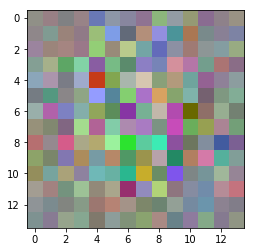

In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

theImage = (visual0 - np.amin(visual0))/(np.amax(visual0) - np.amin(visual0))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)

In [16]:
myNode = np.zeros((1,1,1,32))
myNode[0][0][0][1] = 1
visual1 = model2.predict(myNode)

(1, 14, 14, 3)


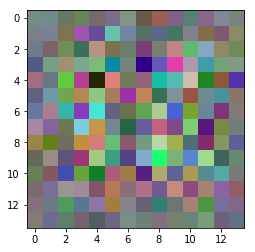

In [17]:
theImage = (visual1 - np.amin(visual1))/(np.amax(visual1) - np.amin(visual1))

print(theImage.shape)

newImage = np.squeeze(theImage)

plt.imshow(newImage)

In [31]:
ADMMweights[0].shape

(5, 5, 3, 32)

In [32]:
ADMMweights[1].shape

(5, 5, 32, 32)

In [11]:
print(model.layers[1].weights[0])

<tf.Variable 'multilayer_adm_msparse_coding_tight_frame/ADMM_convolutional_weights0:0' shape=(5, 5, 3, 32) dtype=float32>


In [12]:
print(model.layers[1].weights[1])

<tf.Variable 'multilayer_adm_msparse_coding_tight_frame/ADMM_convolutional_weights1:0' shape=(5, 5, 32, 32) dtype=float32>


In [ ]:
t = model.layers[1].get_weights()[]

In [9]:
np.sum(np.power(t,2))

8.697397

In [13]:
t2 = model.layers[1].get_weights()[1]
np.sum(np.power(t2,2))

30.360626

In [9]:
#sgd = tf.keras.optimizers.SGD(lr=0.0001, decay=0.000125, momentum=0.5, nesterov=True)
#model.compile(optimizer='sgd', loss='categorical_crossentropy')
#model.fit(x_input, labels, epochs=16, batch_size=32, validation_data=(x_val,labels_val))

Train on 10000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/16
10000/10000 [==============================] - 3037s 304ms/sample - loss: 14.4638 - val_loss: 14.5047
Epoch 2/16
10000/10000 [==============================] - 3055s 306ms/sample - loss: 14.5047 - val_loss: 14.5047
Epoch 3/16
10000/10000 [==============================] - 3043s 304ms/sample - loss: 14.5047 - val_loss: 14.5047
Epoch 4/16
 9984/10000 [============================>.] - ETA: 2s - loss: 14.5069

KeyboardInterrupt: 

In [16]:
5*5*3*32/(5*5*np.sqrt(3*32))

9.797958971132713

In [17]:
5*5*32*32/(5*5*32)

32.0

In [8]:
a = tensorflow.constant([1,2,3])

NameError: name 'tensorflow' is not defined

In [9]:
import tensorflow
a = tensorflow.constant([1,2,3])

In [12]:
sess = Session()
sess.run(a*2)

array([2, 4, 6], dtype=int32)

In [18]:
sum([1,2])

3

In [13]:
a = np.array([[1,2,3,4,5],[2,34,5,6,7]])
a.shape[0]

2